# Time Series Forecasting

### Importing libraries

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
#%matplotlib notebook

### Loading data and basic analysis

In [20]:
airPassData = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month')

In [67]:
airPassData.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [22]:
airPassData.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

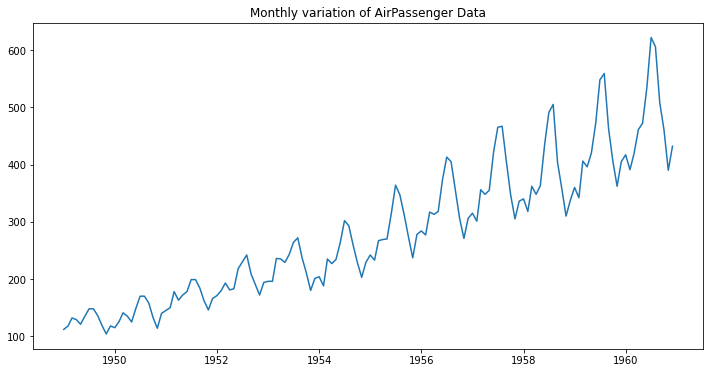

In [92]:
plt.plot(airPassData, label = 'AirPassenger Data')
plt.title('Monthly variation of AirPassenger Data')
plt.show(block = False)

### Function for Performing Dickey Fuller Test

In [58]:
#importing the adfuller function from tsa module
from statsmodels.tsa.stattools import adfuller

def performAdfTest(airPassData):
    #Determing rolling statistics
    rolmean = airPassData.rolling(12).mean()
    rolstd = airPassData.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(airPassData, color = 'blue',label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    test = adfuller(airPassData, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

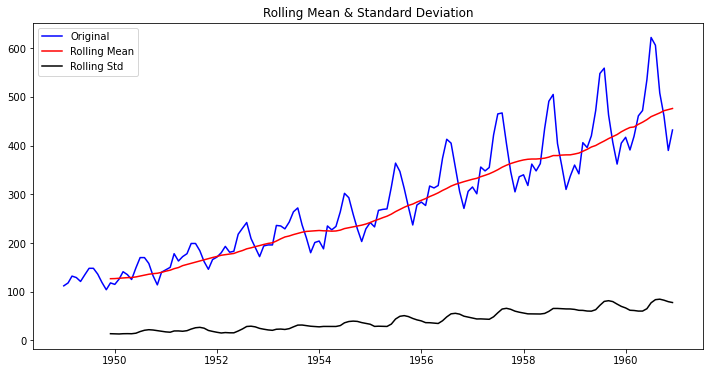

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [93]:
performAdfTest(airPassData)

### Estimation and removal of trend from the data

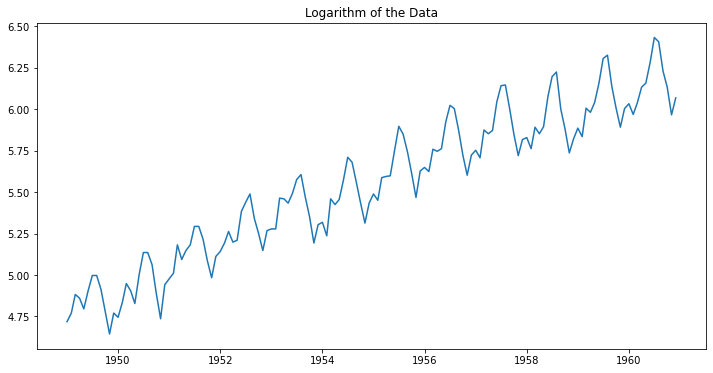

In [94]:
airPassData_log = np.log(airPassData)
plt.plot(airPassData_log)
plt.title('Logarithm of the Data')
plt.show(block = False)

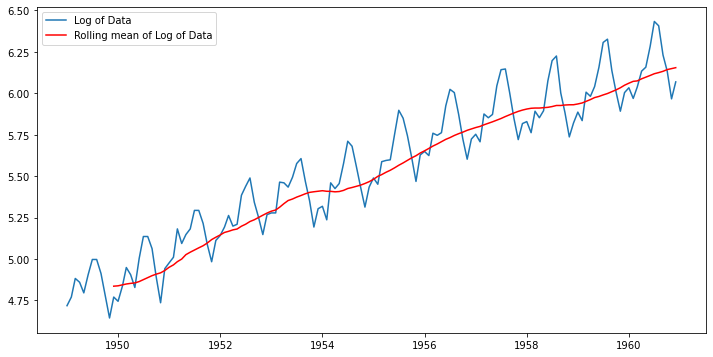

In [95]:
movingAvg = airPassData_log.rolling(12).mean()
a = plt.plot(airPassData_log, label = 'Log of Data')
b = plt.plot(movingAvg, color = 'red', label = 'Rolling mean of Log of Data')
plt.legend(loc = 'best')
plt.show(block = False)

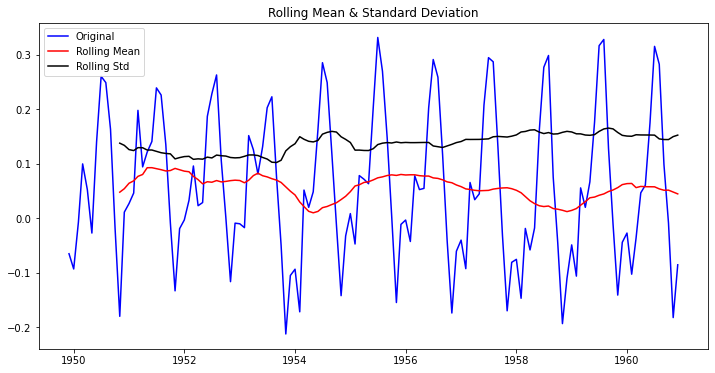

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [97]:
log_movingAvg_diff = airPassData_log - movingAvg
#log_movingAvg_diff.head(13)
log_movingAvg_diff.dropna(inplace = True)
performAdfTest(log_movingAvg_diff)

##### As we can see that the Test Statistic is smaller than 5% critical value, so it can be said that the data has been made stationary with 95% accuracy.

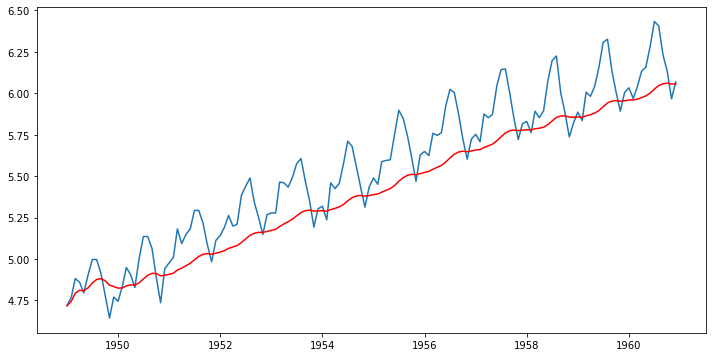

In [105]:
#using the exponentially weighted moving average

expWeightedAvg = airPassData_log.ewm(halflife = 12).mean()
plt.plot(airPassData_log)
plt.plot(expWeightedAvg, color = 'red')
plt.show(block = False)

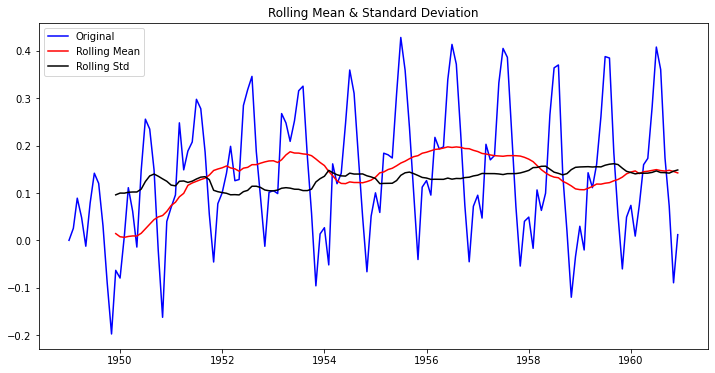

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [104]:
log_ewma_diff = airPassData_log - expWeightedAvg
performAdfTest(log_ewma_diff)

##### As we can see that the Test Statistic is smaller than 1% critical value, so it can be said that the data has been made stationary with 99% accuracy.

### Trend and seasonality removal for complex cases using 
##### 1. differencing
##### 2. decomposition
           

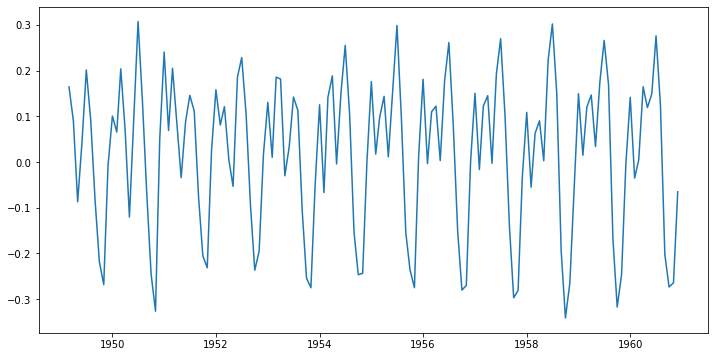

In [112]:
#Using first order differencing
log_diff = airPassData_log - airPassData_log.shift(periods = 2)
plt.plot(log_diff)
plt.show(block = True)

In [113]:
log_diff.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,0.164303
1949-04-01,0.089128
1949-05-01,-0.087011


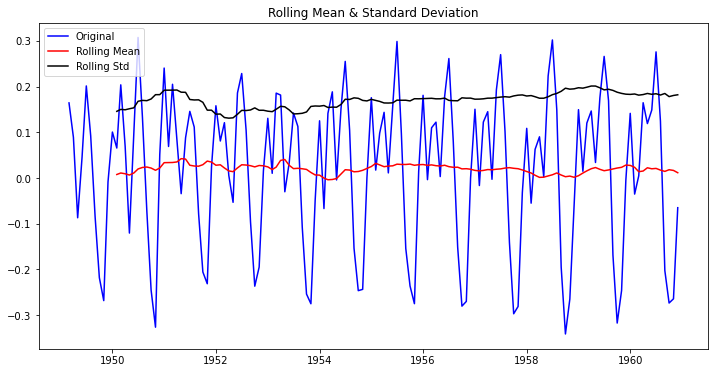

Results of Dickey-Fuller Test:
Test Statistic                  -3.167907
p-value                          0.021919
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [114]:
log_diff.dropna(inplace = True)
performAdfTest(log_diff)

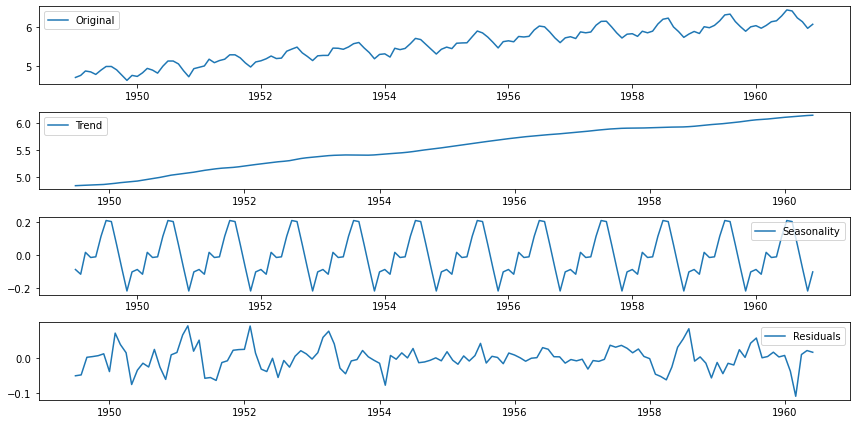

In [115]:
#Using seasonal decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(airPassData_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(airPassData_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

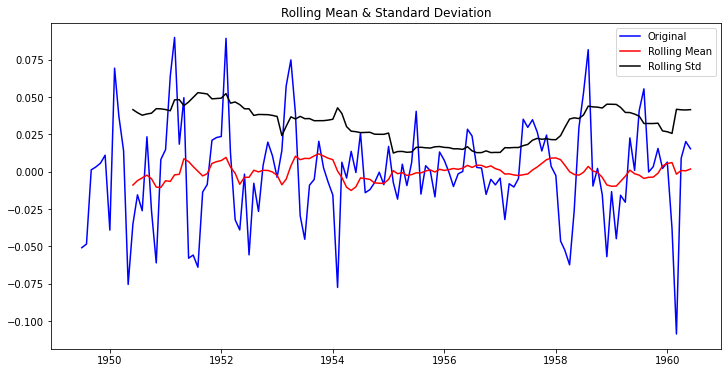

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [116]:
airPassData_log_decompose = residual
airPassData_log_decompose.dropna(inplace=True)
performAdfTest(airPassData_log_decompose)

### ACF and PACF calculations

In [117]:
#ACF and PACF plots:

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(log_diff, nlags = 20)
lag_pacf = pacf(log_diff, nlags = 20, method = 'ols')


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


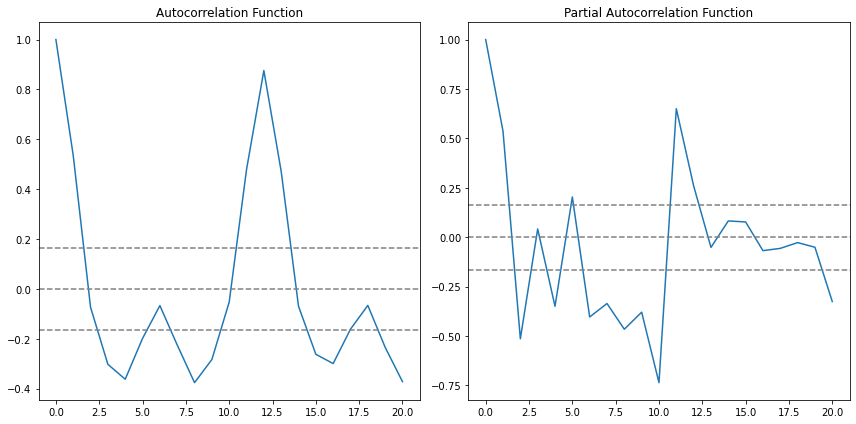

In [119]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle='--', color='gray')
plt.axhline(y = -1.96/np.sqrt(len(log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(log_diff)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf) 
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(log_diff)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### Forecasting using the ARIMA/AR/MA model 

In [120]:
from statsmodels.tsa.arima_model import ARIMA


#### AR model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


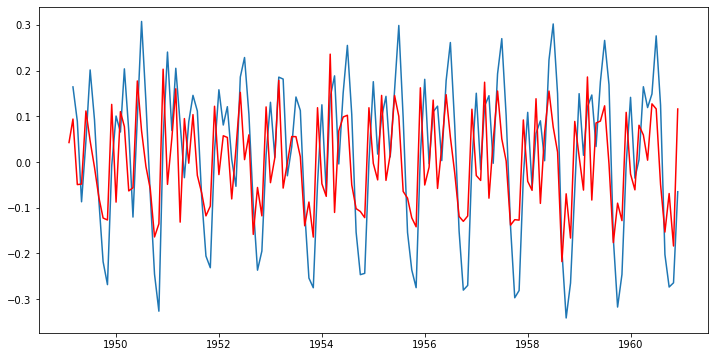

In [130]:
model = ARIMA(airPassData_log, order = (2, 1, 0))  
results_AR = model.fit(disp = -1)  
residuals = pd.DataFrame(results_AR.resid)
plt.plot(log_diff)
plt.plot(residuals, color = 'red')
plt.show(block = False)

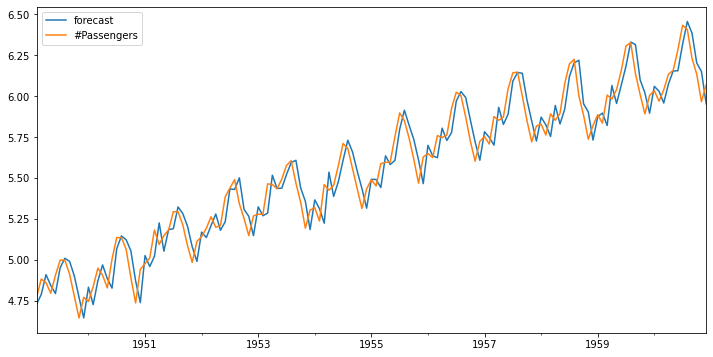

In [131]:
results_AR.plot_predict(dynamic = False)
plt.show()